# A first look at a neural network

Let’s look at a concrete example of a neural network that uses the Python library Keras to learn to classify handwritten digits.The problem we’re trying to solve here is to classify grayscale images of handwritten
digits (28 × 28 pixels) into their 10 categories (0 through 9). We’ll use the MNIST
dataset, a classic in the machine-learning community, which has been around almost
as long as the field itself and has been intensively studied. It’s a set of 60,000 training
images, plus 10,000 test images, assembled by the National Institute of Standards and
Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the
“Hello World” of deep learning—it’s what you do to verify that your algorithms are
working as expected. As you become a machine-learning practitioner, you’ll see
MNIST come up over and over again, in scientific papers, blog posts, and so on.

#### Note on classes and labels

In machine learning, a category in a classification problem is called a class. Data
points are called samples. The class associated with a specific sample is called a
label.

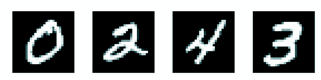
Figure 2.1 MNIST sample digits

## 1- Loading the MNIST dataset in Keras

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images and train_labels form the training set, the data that the model will
learn from. The model will then be tested on the test set, test_images and test_labels.
The images are encoded as Numpy arrays, and the labels are an array of digits, ranging
from 0 to 9. The images and labels have a one-to-one correspondence.

## only for visualising of the data (not in book)

In [3]:
import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from numpy import load
data=load('mnist_digitData.npz')
list = data.files
for item in list:
    print(item)
    print(data[item])

x_test
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_train
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 

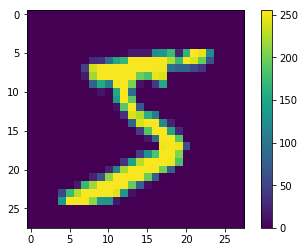

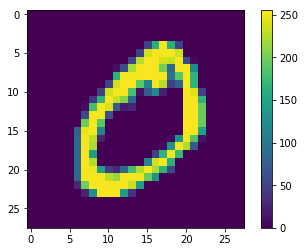

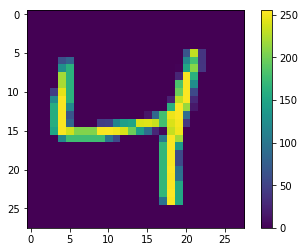

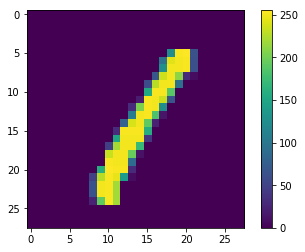

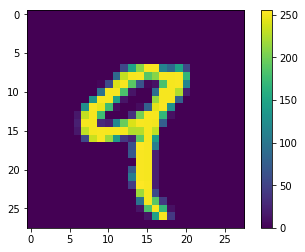

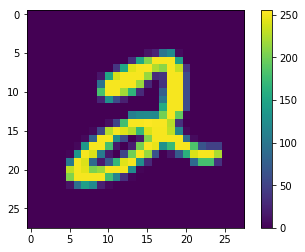

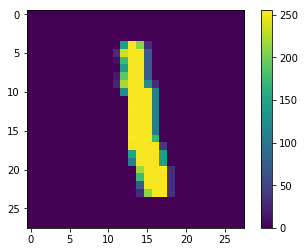

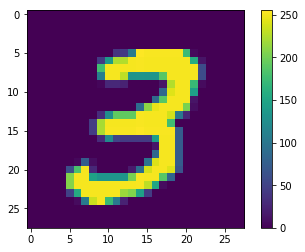

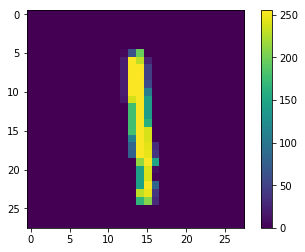

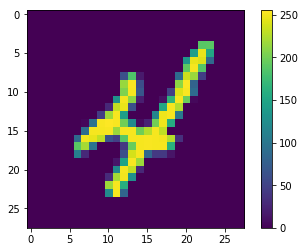

In [6]:
for i in range(0,10):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

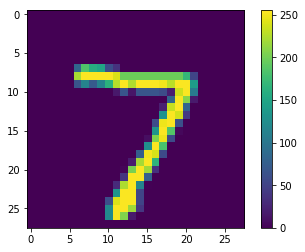

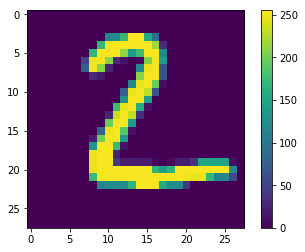

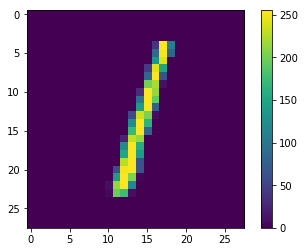

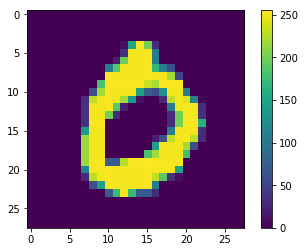

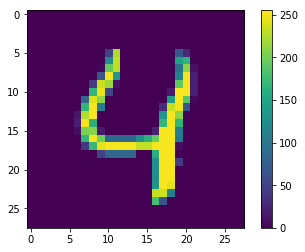

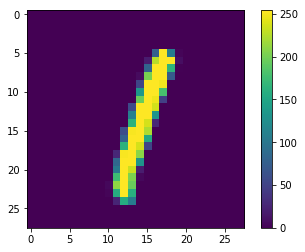

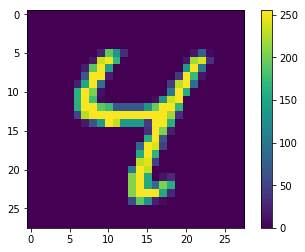

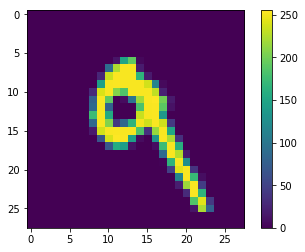

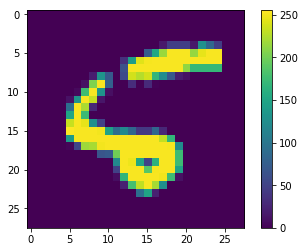

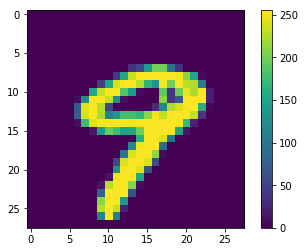

In [7]:
for i in range(0,10):
    plt.figure()
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()

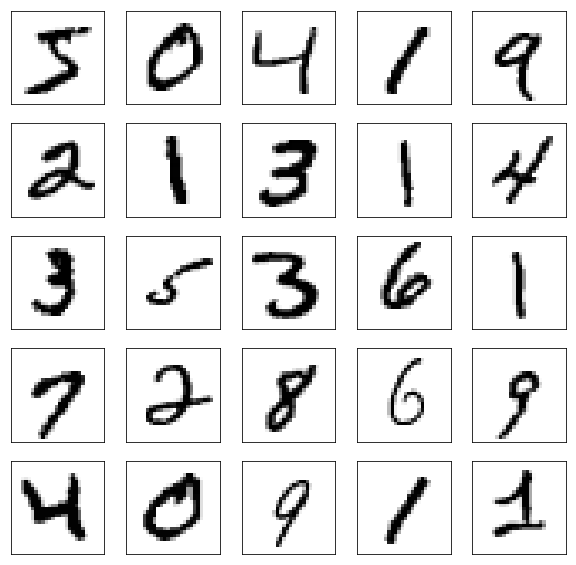

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

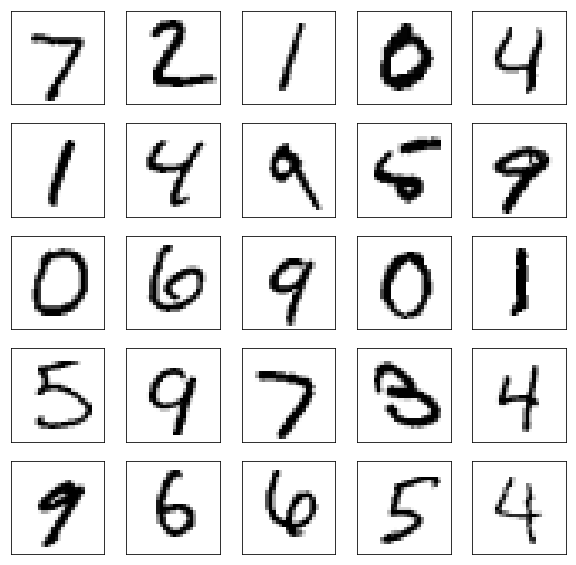

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

#### Let’s look at the training data:

In [10]:
print("Dimention of train Images : ",np.ndim(train_images))
print("Shape of train Images : ",np.shape(train_images))
(x,y,z)=np.shape(train_images)
print(f"Num of images: {x} with pixel size of {y} by {z}")

Dimention of train Images :  3
Shape of train Images :  (60000, 28, 28)
Num of images: 60000 with pixel size of 28 by 28


In [11]:
print("Dimention of train label : ",np.ndim(train_labels))
print("Shape of train label: ",np.shape(train_labels))
print(train_labels)

Dimention of train label :  1
Shape of train label:  (60000,)
[5 0 4 ... 5 6 8]


#### Let’s look at the testing data:

In [12]:
print("Dimention of test Images : ",np.ndim(test_images))
print("Shape of test Images : ",np.shape(test_images))
(a,b,c)=np.shape(test_images)
print(f"Num of images: {a} with pixel size of {b} by {c}")

Dimention of test Images :  3
Shape of test Images :  (10000, 28, 28)
Num of images: 10000 with pixel size of 28 by 28


In [13]:
print("Dimention of test label : ",np.ndim(test_labels))
print("Shape of test label: ",np.shape(test_labels))
print(test_labels)

Dimention of test label :  1
Shape of test label:  (10000,)
[7 2 1 ... 4 5 6]


## 2- The network architecture

In [14]:
from keras import models
from keras import layers

In [15]:
network=models.Sequential()

In [16]:
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


The core building block of neural networks is the layer, a data-processing module that
you can think of as a filter for data. Some data goes in, and it comes out in a more useful
form. Specifically, layers extract representations out of the data fed into them—hopefully,
representations that are more meaningful for the problem at hand. Most of
deep learning consists of chaining together simple layers that will implement a form
of progressive data distillation. A deep-learning model is like a sieve for data processing,
made of a succession of increasingly refined data filters—the layers.
Here, our network consists of a sequence of two Dense layers, which are densely
connected (also called fully connected) neural layers. The second (and last) layer is a
10-way softmax layer, which means it will return an array of 10 probability scores (summing
to 1). Each score will be the probability that the current digit image belongs to
one of our 10 digit classes.To make the network ready for training, we need to pick three more things, as part
of the compilation step:
 A loss function—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.
 An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.
 Metrics to monitor during training and testing—Here, we’ll only care about accuracy
(the fraction of the images that were correctly classified).

## 3- The compilation step

In [17]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Before training, we’ll preprocess the data by reshaping it into the shape the network
expects and scaling it so that all values are in the [0, 1] interval. Previously, our training
images, for instance, were stored in an array of shape (60000, 28, 28) of type
uint8 with values in the [0, 255] interval. We transform it into a float32 array of
shape (60000, 28 * 28) with values between 0 and 1.

## 4- Preparing the image data

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 5- Preparing the labels

In [19]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We’re now ready to train the network, which in Keras is done via a call to the network’s
fit method—we fit the model to its training data:

In [20]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2569 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1047 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.0691 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0508 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0374 - acc: 0.9889


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 75us/step


In [22]:
print('test_acc:', test_acc)

test_acc: 0.9788


In [23]:
print('test_loss:', test_loss)

test_loss: 0.06808772194276098
